<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyMATH</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">py<b style=color:red;>MATH</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyMATH.png"></td>
</tr>
</table>

----
# `pyMATH`

pyMATH, a program package for playing with math in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
tiny=1e-15

----
## 1D Fourier transform

We start discussing **Fourier transformations** in this notebook series with the
**one-dimensional transform** of a signal.

----
### Time domain

We define the **time domain** with:

- Time $t$ [s]
- Period $T$ [s]
- Frequency $f$ [1/s=Hz]
- Angular frequency $\omega$ [1/s]

We have: $T={{1}\over{f}}$ and $\omega=2\pi f$.

The **Fourier transform** pair is given as:
$$
\begin{array}{rcl}
F(\omega) &=& \int\limits_{-\infty}^{+\infty} f(t) e^{-i \omega t} dt \\
f(t)      &=& \int\limits_{-\infty}^{+\infty} F(\omega) e^{i \omega t} d\omega
\end{array}
$$

----
### Space domain

We define the **space domain** with:

- Position $x$ [m]
- Wavelength $\lambda$ [m]
- Wave number $\nu$ [1/m]
- Angular wave number $k$ [1/m]

We have: $\lambda={{1}\over{\nu}}$ and $k=2\pi \nu$.

The **Fourier transform** pair is given as:
$$
\begin{array}{rcl}
F(k) &=& \int\limits_{-\infty}^{+\infty} f(x) e^{-i k x} dx \\
f(x) &=& \int\limits_{-\infty}^{+\infty} F(k) e^{i k x} dk
\end{array}
$$

----
## Decibel

Consider two amplitudes $P_1$ and $P_2$, which are *proportional* to power.

The logarithm of the ratio of these two amplitudes is called **Bel**, ten times this
logarithm is the better known **Decibel**:
$$
dB = 10 \log\left( {{P_1}\over{P_2}} \right)
$$

Consider two amplitudes $RP_1$ and $RP_2$, which are *proportional* to the square root of power.

The logarithm of the ratio of these two amplitudes is called **Bel**, ten times this
logarithm is the better known **Decibel**:
$$
dB = 10 \log\left( {{RP_1^2}\over{RP_2^2}} \right) = 20 \log\left( {{RP_1}\over{RP_2}} \right)
$$



----
## Examples


Define profile $x \in [-3,3]$ m. Calculate wave numbers $k_x$ with function `fftfreq`,
shift with `fftshift` for more clarity:

In [2]:
tmin = -3
tmax = +3
nt   = 101
#dx   = (xmax-xmin)/(nx-1)
t,dt = np.linspace(tmin,tmax,nt,retstep=True)
#kx  = (-nx/2 + np.arange(0,nx))*2*np.pi/(xmax-xmin)
omega = np.fft.fftfreq(t.size, d=dt)
omega = np.fft.fftshift(omega)

Create plotting function:

In [3]:
def plot_f_F_power(name,t,f,omega,F,power):
    fig,axs = plt.subplots(1,3,figsize=(12,4))
    axs[0].plot(t,f)
    axs[0].set_title(name)
    axs[0].set_xlabel('t [s]')
    axs[0].set_ylabel('f(t)')

    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position("right")
    axs[1].plot(omega,F.real,label='real')
    axs[1].plot(omega,F.imag,label='imag')
    axs[1].set_xlabel('$\omega$ [Hz]')
    axs[1].set_ylabel('F($\omega$) [?]')
    axs[1].set_xlim([-5.,5.])
    #axs[1].set_ylim([-200.,1.])
    axs[1].legend()

    axs[2].yaxis.tick_right()
    axs[2].yaxis.set_label_position("right")
    axs[2].plot(omega,power.real)
    axs[2].set_xlabel('$\omega$ [Hz]')
    axs[2].set_ylabel('|F($\omega$)|$^2$ [dB]')
    plt.tight_layout()

----
## Simple examples

1. **cosine** function

$$
f(t) = \cos(\omega_1 t)
$$
with $\omega_1=1$ Hz.

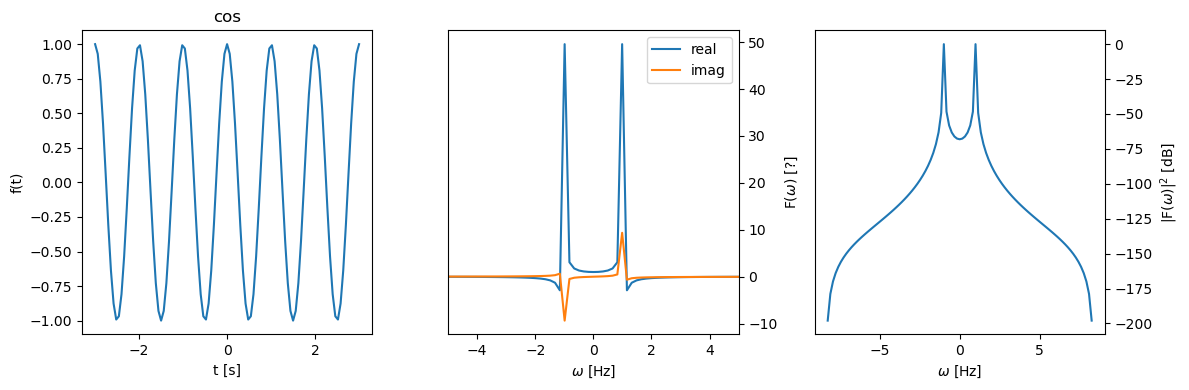

In [7]:
def f(t,f1=1):
    f=np.cos(2*np.pi*f1*t)
    #f=f+np.cos(np.pi*t)
    #f=f+np.cos(4*np.pi*t)
    return f

f = f(t,f1=1)
F = np.fft.fft(f)
F = np.fft.fftshift(F)
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())

plot_f_F_power('cos',t,f,omega,F,power)

2. **symmetric box** function

$$
f(t) = \left\{
\begin{array}{cc}
1 & |t| \le 1 \\
0 & \mbox{else}
\end{array}
\right.
$$

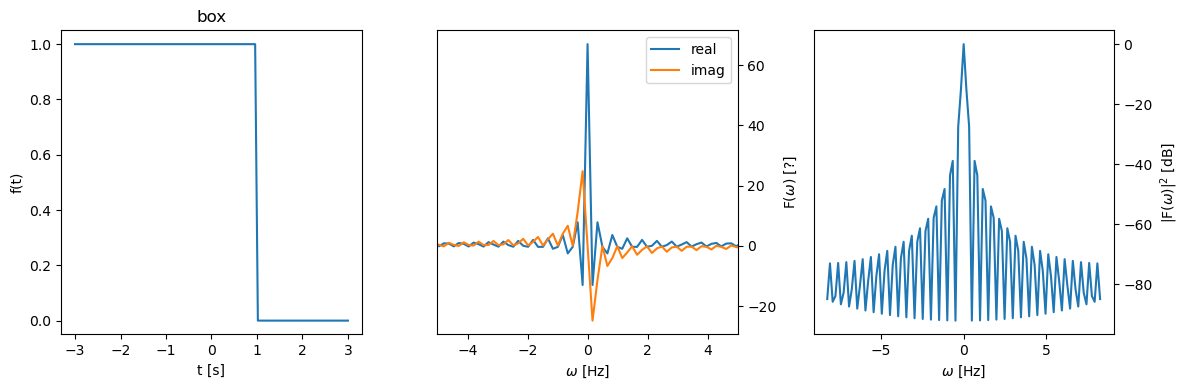

In [9]:
def f(t,a=1):
    f = np.where(t<a,1,0)
    return f

f = f(t,a=1)
F = np.fft.fft(f)
F = np.fft.fftshift(F)
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
plot_f_F_power('box',t,f,omega,F,power)

3. **asymmetric box** function

$$
f(x) = \left\{
\begin{array}{cc}
1 & 0 \le x \le 2 \\
0 & \mbox{else}
\end{array}
\right.
$$

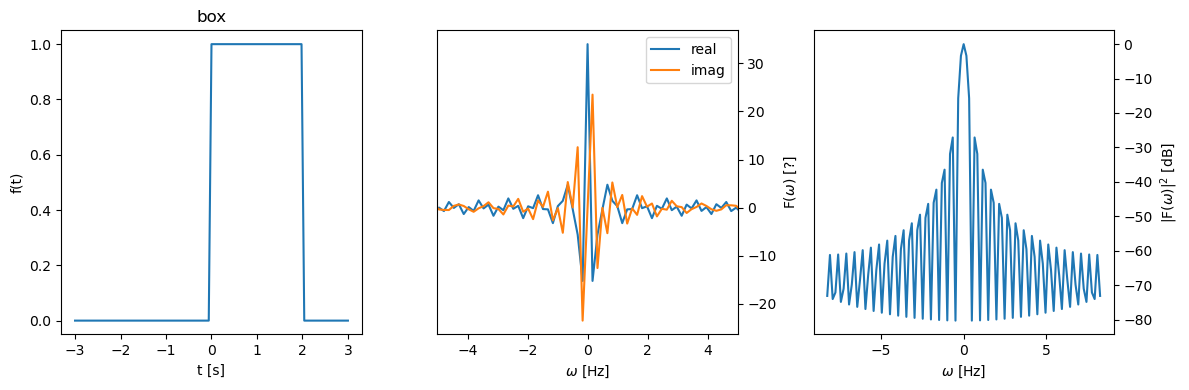

In [10]:
def f(t,a=1):
    f=np.zeros(len(t))
    for i in range(len(f)):
        #if (np.abs(x[i]) <= a):
        if (t[i] >= 0 and t[i] <= 2*a):
            f[i] = 1
    return f

f = f(t,a=1)
F = np.fft.fft(f)
F = np.fft.fftshift(F)
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
plot_f_F_power('box',t,f,omega,F,power)

5. **decaying exponential** function

$$
f(t) = e^{-a |t|}
$$
with $a$ a bandwidth.

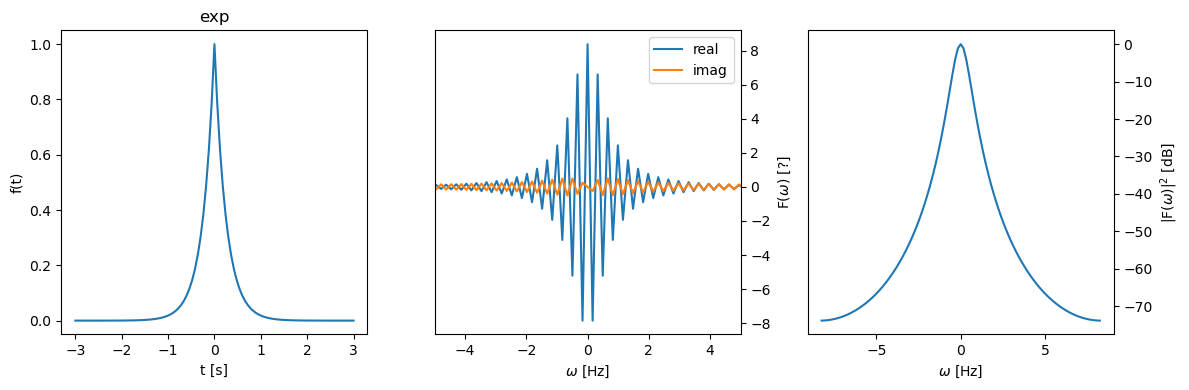

In [11]:
def f(t,a=4):
    f=np.exp(-a*np.abs(t))
    return f

f = f(t,a=4)
F = np.fft.fft(f)
F = np.fft.fftshift(F)
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
plot_f_F_power('exp',t,f,omega,F,power)

6. **Constant value**
$$
f(t) = 1
$$

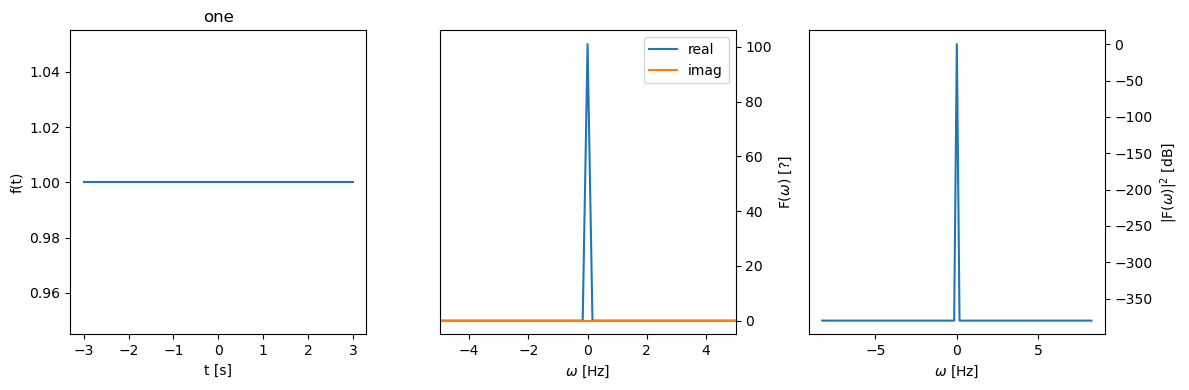

In [12]:
def f(t):
    f=np.ones(len(t))
    return f

f = f(t)
F = np.fft.fft(f)
F = np.fft.fftshift(F)
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
plot_f_F_power('one',t,f,omega,F,power)

## Sine functions with noise

$$
\begin{array}{rcl}
f_1(t) = \sin\left( 2 \pi f_1 t \right), \quad t \in [t_1,t_2] \\
f_2(t) = \sin\left( 2 \pi f_2 t \right), \quad t \in [t_1,t_2] 
\end{array}
$$
$$
f(t) = f_1(t) + f_2(t) + noise(t)
$$

In [13]:
dt = 0.005
t = np.arange(0, 2, dt)
print(t.shape)

(400,)


In [14]:
dt = 0.005
t = np.arange(0, 2, dt)
frequency1 = 4.
frequency2 = 8.
np.random.seed(1234)
# Raumbereich
f1 = np.sin(2*np.pi*frequency1*t) 
f2 = np.sin(2*np.pi*frequency2*t)
f  = f1 + f2 + 0.90*(np.random.random(t.size)-0.5)*2
# Fourier transform
F = np.fft.fft(f)
Fnonoise = F.copy()
# power spectrum
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
# The corresponding frequencies
sample_freq = np.fft.fftfreq(f.size, d=dt)
# shift to center frequencies
F           = np.fft.fftshift(F)
power       = np.fft.fftshift(power)
sample_freq = np.fft.fftshift(sample_freq)

(-100.0, 1.0)

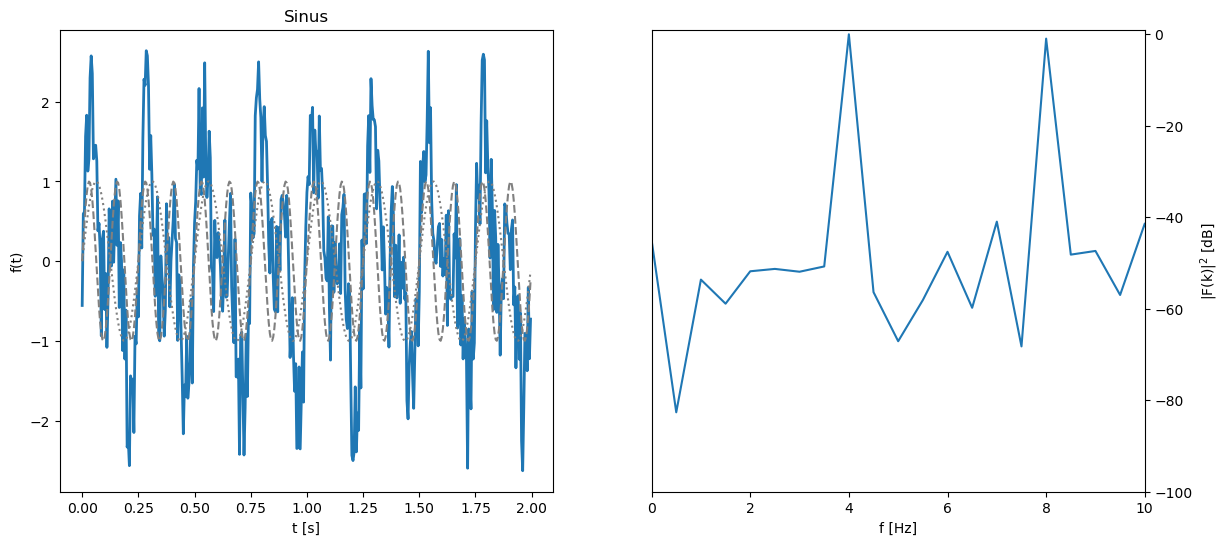

In [15]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

axs[0].plot(t,f,linewidth=2)
axs[0].plot(t,f1,linestyle=':',color='gray')
axs[0].plot(t,f2,linestyle='--',color='gray')
axs[0].set_title('Sinus')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('f(t)')

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].plot(sample_freq,power)
axs[1].set_xlabel('f [Hz]')

axs[1].set_ylabel('|F(k)|$^2$ [dB]')
axs[1].set_xlim([0.,10.])
axs[1].set_ylim([-100.,1.])

### Remove noise 
We cut the spectrum above a frequency of $f=8.5$ Hz by setting the values to zero, then transport the spectrum back
to the time domain.

In [16]:
# move sample_freq back to fft order
sample_freq = np.fft.ifftshift(sample_freq)
# cut away FFT data above threshold
Fnonoise[np.abs(sample_freq) > 8.5] = 0
# recover signal with inverse FFT
fnonoise = np.fft.ifft(Fnonoise)

# power spectrum
power = np.abs(Fnonoise)**2
power = 20*np.log10((power+tiny)/power.max())
# shift to center frequencies
sample_freq = np.fft.fftshift(sample_freq)
power       = np.fft.fftshift(power)

/opt/miniconda3/envs/python_pygimli/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-100.0, 1.0)

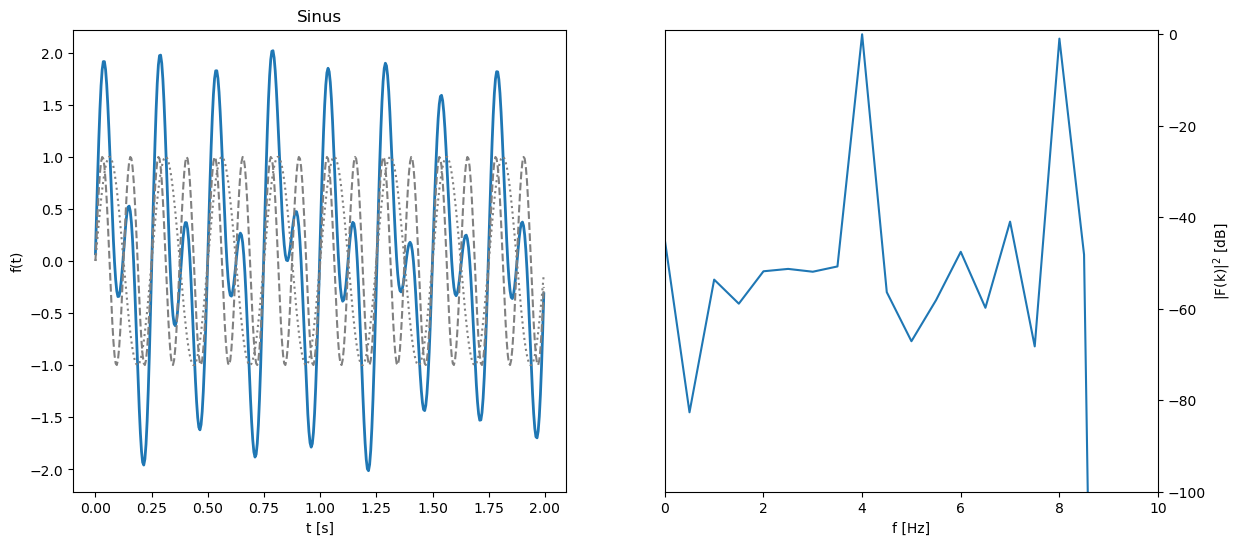

In [17]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

axs[0].plot(t,fnonoise,linewidth=2)
axs[0].plot(t,f1,linestyle=':',color='gray')
axs[0].plot(t,f2,linestyle='--',color='gray')
axs[0].set_title('Sinus')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('f(t)')

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].plot(sample_freq,power)
axs[1].set_xlabel('f [Hz]')

axs[1].set_ylabel('|F(k)|$^2$ [dB]')
axs[1].set_xlim([0.,10.])
axs[1].set_ylim([-100.,1.])

... done